In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

In [3]:
x = np.random.normal(5.0,1.0,200) # (mean, std., N)
m=3
b=60
noise=np.random.normal(5,1.0,200)
y = m * x + b + noise

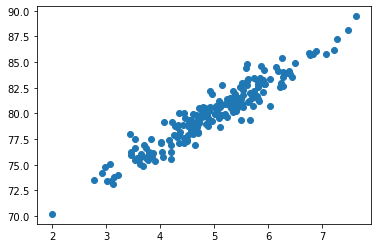

In [4]:
plt.scatter(x,y)

In [5]:
[m_fit,b_fit]=np.polyfit(x,y,1)
print(b_fit,m_fit)

64.79342221522755 3.057524823389493


In [6]:
y_fit=m_fit*x+b_fit

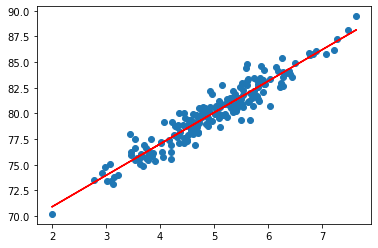

In [11]:
plt.scatter(x,y)
plt.plot(x,y_fit,'r-')

-18.760790172281666 0.2966607172228187


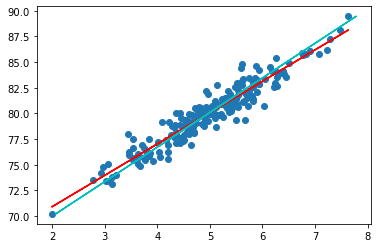

In [12]:
# Regress X on Y instead of Y on X:
[m_tif,b_tif]=np.polyfit(y,x,1)
print(b_tif,m_tif)
x_tif=m_tif*y+b_tif

plt.scatter(x,y)
plt.plot(x,y_fit,'r-')
plt.plot(x_tif,y,'c-')

In [15]:
y_res=y_fit-y
r_squared=1-(np.var(y_res)/np.var(y))
r_squared

0.9070475070332992

In [18]:
y_rand=np.random.randn(len(x))
[m_fit_rand,b_fit_rand]=np.polyfit(x,y_rand,1)
y_fit_rand=m_fit_rand*x+b_fit_rand
print(b_fit_rand,m_fit_rand)

-0.06492290425946795 0.005789363051517555


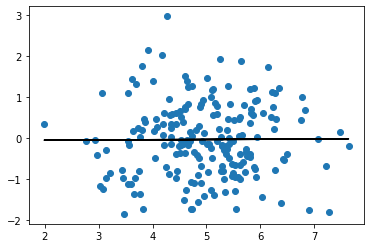

In [20]:
plt.scatter(x,y_rand)
plt.plot(x,y_fit_rand,'k-')

4.958404547277915 0.006870581845096335


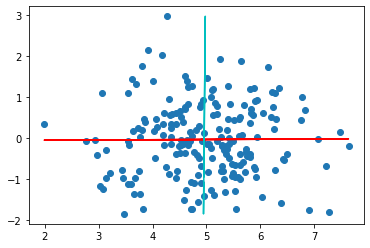

In [21]:
# Regress X on Y instead of Y on X:
[m_tif,b_tif]=np.polyfit(y_rand,x,1)
print(b_tif,m_tif)
x_tif=m_tif*y_rand+b_tif

plt.scatter(x,y_rand)
plt.plot(x,y_fit_rand,'r-')
plt.plot(x_tif,y_rand,'c-')

In [22]:
y_res_rand=y_rand-y_fit_rand
r_squared_rand=1-(np.var(y_res_rand)/np.var(y_rand))
r_squared_rand

3.9776292676485525e-05

In [23]:
from scipy.stats import linregress

In [24]:
slope, intercept, r_value, P_value, std_err = linregress(x, y)

In [25]:
slope, intercept, r_value, P_value, std_err

(3.05752482338949,
 64.79342221522752,
 0.9523904173359259,
 4.2841533313876946e-104,
 0.06955893123497438)

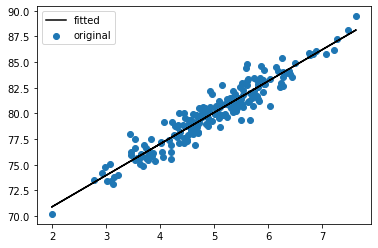

In [26]:
plt.scatter(x, y)
plt.plot(x, intercept + slope*x, 'k')
plt.legend(['fitted','original'])

In [28]:
file_nino34='/scratch/kpegion/nino34_1982-2019.oisstv2_anoms.nc'
ds_nino34=xr.open_dataset(file_nino34)
ds_nino34

<xarray.Dataset>
Dimensions:  (time: 456)
Coordinates:
  * time     (time) datetime64[ns] 1982-01-01 1982-02-01 ... 2019-12-01
    month    (time) int64 ...
Data variables:
    sst      (time) float32 ...

In [29]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [30]:
path='/shared/ccsm4/kpegion/obs2/CLIM_INDICES/'
file='nao.data'
index_name='nao'

df=pd.read_table(path+file,skiprows=1,
                 header=None,delim_whitespace=True,
                 index_col=0,parse_dates=True,
                 na_values=['-99.9','-99.90'])
df.drop(df.tail(3).index,inplace=True)

In [31]:
start_date=str(df.index[0])+'-'+str(df.columns[0])+'-01'
end_date=str(df.index[-1])+'-'+str(df.columns[-1])+'-01'
print(start_date)

1948-1-01


In [32]:
dates=pd.date_range(start=start_date,end=end_date,freq='MS')
dates

DatetimeIndex(['1948-01-01', '1948-02-01', '1948-03-01', '1948-04-01',
               '1948-05-01', '1948-06-01', '1948-07-01', '1948-08-01',
               '1948-09-01', '1948-10-01',
               ...
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', length=876, freq='MS')

In [55]:
clim_index=df.T.unstack().values
clim_index=clim_index.astype('float32')

In [56]:
ds_index=xr.DataArray(clim_index,
                      coords={'time':dates},
                              dims=['time'])        
ds_index=ds_index.to_dataset(name='nao')
ds_index

<xarray.Dataset>
Dimensions:  (time: 876)
Coordinates:
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2020-12-01
Data variables:
    nao      (time) float32 nan nan nan nan nan nan ... 0.03 1.11 nan nan nan

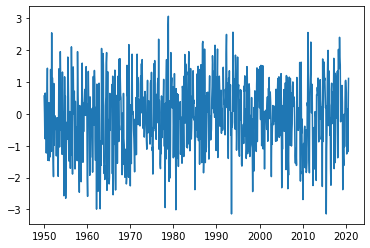

In [57]:
plt.plot(ds_index['time'],ds_index['nao'])

In [58]:
ds_nino34

<xarray.Dataset>
Dimensions:  (time: 456)
Coordinates:
  * time     (time) datetime64[ns] 1982-01-01 1982-02-01 ... 2019-12-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    sst      (time) float32 0.1705 -0.04169 -0.05536 ... 0.5591 0.5179 0.422

In [59]:
NAO=ds_index['nao'].sel(time=slice(ds_nino34['time'][0],ds_nino34['time'][-1]))

In [60]:
ds_nino34

<xarray.Dataset>
Dimensions:  (time: 456)
Coordinates:
  * time     (time) datetime64[ns] 1982-01-01 1982-02-01 ... 2019-12-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    sst      (time) float32 0.1705 -0.04169 -0.05536 ... 0.5591 0.5179 0.422

In [61]:
ds_nino34['sst']

<xarray.DataArray 'sst' (time: 456)>
array([ 0.170458, -0.041687, -0.055365, ...,  0.559116,  0.517879,  0.421961],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1982-01-01 1982-02-01 ... 2019-12-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

In [62]:
NAO

<xarray.DataArray 'nao' (time: 456)>
array([-1.55,  0.86,  0.8 , -0.04, -0.44, -1.34,  1.18,  0.21,  1.86,
       -0.29,  1.55,  1.56,  1.34, -1.04,  0.59, -1.07, -0.01,  1.31,
        1.22,  1.95, -0.95,  1.22, -1.16,  0.18,  1.42,  0.37, -0.79,
       -0.45,  0.55, -0.12, -0.04,  1.35,  0.31,  0.43, -0.2 , -0.09,
       -2.38, -1.  , -0.19,  0.2 , -0.4 , -0.5 ,  1.25, -0.74, -0.36,
        1.49, -0.84,  0.11,  0.78, -1.58,  1.39, -0.79,  0.84,  1.54,
        0.15, -1.53, -0.95,  2.2 ,  2.27,  0.83, -1.85, -1.27, -0.26,
        2.03,  0.96, -1.53,  0.55, -1.19, -1.04,  0.66,  0.06,  0.21,
        0.68,  0.42, -0.58, -1.42,  0.64,  1.19, -0.32, -0.07, -0.82,
       -0.66, -0.49,  0.48,  0.85,  1.82,  1.54,  0.16,  1.33,  0.03,
        1.  , -0.11,  2.15,  0.48,  0.03, -1.15,  0.7 ,  1.16,  1.13,
        2.03, -1.37,  0.29,  0.56,  1.12,  1.18,  0.76, -0.39,  0.11,
        0.49,  0.74, -0.61,  0.17,  0.12, -0.52, -0.46,  1.46,  0.61,
        0.3 ,  0.37,  0.34, -0.66,  0.77,  0.51,  1.88,  2.49,  0.51,
        0.19,  0.97, -0.28, -1.4 ,  1.12,  0.35,  1.35,  0.12,  0.3 ,
        0.91, -0.67, -0.29, -3.14,  0.03, -0.41, -0.26,  2.56,  1.36,
        0.7 ,  0.08,  0.92,  1.1 , -0.48,  1.84,  1.34,  0.36, -1.14,
       -0.54,  0.54,  1.78,  0.57,  0.85,  0.91, -1.07, -1.33,  0.44,
       -0.19,  0.76,  0.45,  0.72, -1.59, -1.64, -0.65, -0.52, -0.66,
       -0.33, -0.93,  0.87,  0.7 ,  1.19, -0.69,  0.15, -0.72, -1.4 ,
...
       -0.47, -1.11,  0.26, -0.48,  0.35,  0.76, -0.55, -0.46, -0.5 ,
        0.97, -1.02, -1.75,  1.2 , -1.01,  1.15,  0.93, -2.35, -1.43,
       -1.92,  0.33,  1.15, -0.25, -0.98,  1.11,  0.04,  0.66, -1.01,
       -0.55, -0.31,  0.85,  1.  ,  0.48,  0.23,  0.53,  0.38, -0.32,
       -1.31, -1.55, -1.09, -1.24, -1.62,  1.14,  0.47, -0.47, -0.35,
       -0.52, -0.38,  0.19, -0.36,  1.61, -0.91, -2.11, -0.37,  1.62,
       -0.61, -0.16, -1.88, -1.8 , -2.69, -1.33, -0.93, -1.33, -0.52,
       -0.39, -1.69, -0.62, -0.5 , -1.84, -1.8 , -1.53,  0.35,  0.24,
        2.55, -0.01, -0.98, -1.48, -1.85,  0.67,  0.94,  1.3 ,  2.25,
        0.86,  0.03,  0.93,  0.37, -0.79, -2.25, -1.29, -1.39, -0.43,
       -1.73, -0.74,  0.07, -0.11, -0.96, -2.09,  0.6 ,  0.58,  0.83,
        0.7 ,  1.12,  0.38, -0.88,  0.81,  0.79, -0.17,  1.07,  0.44,
        0.19, -0.8 , -0.67,  0.21, -2.28,  1.72, -0.87,  0.58,  1.63,
        1.57,  1.05,  1.12,  0.64,  0.19,  0.24, -3.14, -1.1 , -0.49,
        0.99,  1.7 ,  1.99, -0.37,  1.35,  0.37,  0.26, -0.67, -0.13,
       -1.72, -2.24,  0.74,  0.96, -0.31,  0.35,  0.05,  0.69,  0.37,
        1.74, -1.72,  0.35,  1.28, -1.53, -0.45,  0.71, -0.14,  0.73,
        1.17,  1.34, -1.38,  1.2 ,  2.02,  1.41,  1.42,  2.4 ,  1.78,
        1.53, -0.25,  0.48,  0.18, -0.11,  0.89,  0.36, -2.38, -0.79,
       -1.39, -1.62, -0.01, -1.03,  0.16,  1.02], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1982-01-01 1982-02-01 ... 2019-12-01

In [63]:
slope, intercept, r_value, P_value, std_err = linregress(ds_nino34['sst'],NAO)

In [64]:
slope, intercept, r_value, P_value, std_err

(0.01857021833138462,
 0.035021945218994585,
 0.016767213845171162,
 0.7210228755841691,
 0.051971723933090325)

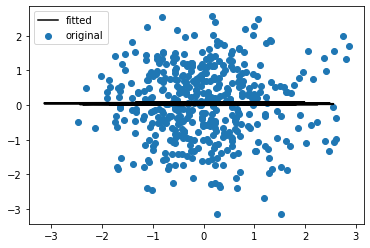

In [66]:
plt.scatter(ds_nino34['sst'],NAO)
plt.plot(NAO, intercept + slope*ds_nino34['sst'], 'k')
plt.legend(['fitted','original'])